In [ ]:
!pip install datasets
!pip install evaluate
!pip install fsspec==2023.9.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.4/173.4 kB 14.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2023.9.2 which is incompatible.



⚙️ **Requerimientos importantes sobre el ejercicio**

- El notebook debe ejecutarse **de principio a fin sin intervención manual**.
- Si utilizas librerías que no están incluidas por defecto en Google Colab, **asegúrate de instalarlas dentro del notebook** (por ejemplo: `!pip install ...`).

- Algunas celdas incluyen identificadores especiales que indican ciertas normas que **debes** respetar:
 - `#NO-MODIFY: DATA LOAD`  
    🔒 **No modifiques** el contenido de esta celda.

  - `#NO-MODIFY: VARIABLE NAME`  
    ✏️ Puedes modificar o añadir información **dentro de la celda**, pero **sin cambiar el nombre de la variable asignada**. No incluyas más variables de las existentes en la celda.

  - `#MODIFY: ADD INFO TO SOLVE FUNCTION`  
    🔧 Puedes modificar el **interior de la función** para resolver la tarea, pero **no cambies su nombre, la cabecera ni el `return`**.



## Imports

In [ ]:
import numpy as np
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Add your imports here
import pandas as pd
import matplotlib.pyplot as plt

from wordcloud import WordCloud

from sklearn.metrics import classification_report, confusion_matrix

from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    DataCollatorWithPadding,
    TrainingArguments,
    Trainer,
)

import evaluate

# 🔍 Ejercicio1: Detección de profesiones en tweets

## Enunciado

En este ejercicio vamos a trabajar con un conjunto de datos procedente de medios sociales online.

Utilizaremos un subconjunto de los datos de la tarea 1 del shared task [**ProfNER**](https://temu.bsc.es/smm4h-spanish), centrada en la detección de menciones a profesiones en tweets publicados durante la pandemia del COVID-19. El objetivo original de la tarea era analizar que profesiones podrían haber sido especialmente vulnerables en el contexto de la crisis sanitaria.

Para simplificar el ejercicio, he preparado una versión reducida del dataset original. Tu tarea será entrenar un clasificador binario basado en la arquitectura Transformers, que, dado un tweet, determine si contiene una mención explícita a una profesión (etiqueta `1`) o no (etiqueta `0`).




✅ **Objetivos del ejercicio**

A lo largo de este notebook, completarás las siguientes etapas para construir un clasificador de menciones a profesiones en tweets:

1. **Análisis Exploratorio de Datos (EDA)**: Calcular estadísticas básicas del conjunto de datos (como el número de ejemplos del training set, la distribución de clases del dataset, la longitud media de los textos) o crear visualizaciones para cmprender mejor el contenido de los documentos usando wordclouds o histogramas.

2. **Selección y justificación del modelo**: Elegir un modelo del Hub de Huggingface adecuado para los datos con los que se va a trabajar y el tipo de tarea a desarrollar.

3. **Entrenamiento del clasificador**: Entrenar el modelo de forma reproducible y evaluar su rendimiento sobreel conjunto de datos de validación, incluyendo un classification score y matriz de confusion

4. **Generación de predicciones sobre el conjunte de test**: Aplicar el modelo entrenado al conjunto de test, y guardar las predicciones en un archivo `.tsv` de 2 columnas `id` y `label` separadas por tabulador

📝 **Criterios de Evaluación**

Tu trabajo será evaluado según los siguientes criterios:

| Criterio                                            | Peso  |
|-----------------------------------------------------|--------|
| 🔍 Análisis exploratorio y preprocesamiento         | 20%   |
| 🤖 Selección y justificación del modelo             | 25%   |
| 📁 Formato y validez del archivo de predicciones    | 5%    |
| ⚙️ Ejecución correcta del notebook (sin intervención) | 10%   |
| 📈 Rendimiento del modelo sobre el conjunto de test | 30%   |
| ✍️ Claridad y calidad de las explicaciones          | 10%   |



🔔 **Nota importante:**

> El rendimiento del modelo se evaluará utilizando métricas estándar como el **F1-score** sobre el conjunto de test.

> El archivo de predicciones debe respetar **estrictamente** el formato solicitado (`id` y `label`, separados por tabulador y con extensión `.tsv`).  
  ❗ Si el archivo no cumple con este formato, **el ejercicio no podrá ser evaluado en esa sección**.

> El/la estudiante con el **mayor F1-score** obtendrá la puntuación máxima en el apartado de rendimiento. El resto de calificaciones se ajustarán de forma proporcional al mejor resultado



⚙️ **Requerimientos y reglas**

- El notebook debe ejecutarse **de principio a fin sin intervención manual**.
- Si utilizas librerías que no están incluidas por defecto en Google Colab, **asegúrate de instalarlas dentro del notebook** (por ejemplo: `!pip install ...`).

- Algunas celdas incluyen identificadores especiales que indican ciertas normas que **debes** respetar:
 - `#NO-MODIFY: DATA LOAD`  
    🔒 **No modifiques** el contenido de esta celda.

  - `#NO-MODIFY: VARIABLE NAME`  
    ✏️ Puedes modificar o añadir información **dentro de la celda**, pero **sin cambiar el nombre de la variable asignada**. No incluyas más variables de las existentes en la celda.

  - `#MODIFY: ADD INFO TO SOLVE FUNCTION`  
    🔧 Puedes modificar el **interior de la función** para resolver la tarea, pero **no cambies su nombre, la cabecera ni el `return`**.


# Tu resolución (rellena las celdas marcadas)

## Obtención de datos

Descargamos los datos del [repositorio de Huggingface](https://huggingface.co/datasets/luisgasco/profner_classification_master).

In [ ]:
#NO-MODIFY: DATA LOAD
from datasets import load_dataset, Dataset, DatasetDict, ClassLabel
dataset = load_dataset("luisgasco/profner_classification_master")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/480k [00:00<?, ?B/s]

data/validation-00000-of-00001.parquet:   0%|          | 0.00/162k [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/166k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2786 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/999 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1001 [00:00<?, ? examples/s]

El dataset contiene tres subsets:
- **train** y **validation**: Contienen el identificador del tweet, el texto, y su etiqueta, que podrá tener valor 1, si contiene una mención de una profesión; o valor 0, si no contiene una mención de una profesión.
- **test**: El test set tambiíen contiene la información de label por un requerimiento de Huggingface, pero el contenido de esta variable es siempre "-1". Es decir que deberéis predecir nuevas etiquetas una vez hayáis entrenado el modelo utilizando el train y el validation set.

## Análisis exploratorio de datos

Para hacer el análisis exploratorio de datos, transformamos cada subset a un pandas dataframe para mayor comodidad.

In [ ]:
#NO-MODIFY: DATA LOAD
dataset_train_df = dataset["train"].to_pandas()
dataset_val_df = dataset["validation"].to_pandas()
dataset_test_df = dataset["test"].to_pandas()

**Número de documentos**

Obten con la función `get_num_docs_evaluation()` el número de documentos del dataset de training y validation.

> Recuerda incorporar la información para el cálculo dentro del a siguiente celda, sin modificar los atributos de entrada ni de salida de la función, ni su nombre.

In [ ]:
#MODIFY: ADD INFO TO SOLVE FUNCTION
def get_num_docs_evaluation(dataset_df):
  # Modifica la función.
  num_docs = len(dataset_df)
  # No modifiques el return
  return num_docs


Una vez generada la función, puedes utilizarla posteriormente para calcular resultados y comentarlos

In [ ]:
# Aplica la función
num_train_docs = get_num_docs_evaluation(dataset_train_df)
num_val_docs = get_num_docs_evaluation(dataset_val_df)

print(f"Número de documentos en train: {num_train_docs}")
print(f"Número de documentos en validation: {num_val_docs}")

Número de documentos en train: 2786
Número de documentos en validation: 999


Podemos observar que el conjunto de entrenamiento contiene 2.786 documentos, mientras que el conjunto de validación tiene 000 documentos. Esta proporción es razonable en tareas de clasificación, lo cual nos permite entrenar correctamente entrenar el modelo y a la vez evaluar su rendimiento sin sobreajuste.

**Número de documentos duplicados**

Obten con la función `detect_duplicates_evaluation()` el número de documentos duplicados del dataset de training y validation.

> Recuerda incorporar la información para el cálculo dentro del a siguiente celda, sin modificar los atributos de entrada ni de salida de la función, ni su nombre.

In [ ]:
#MODIFY: ADD INFO TO SOLVE FUNCTION
def detect_duplicates_evaluation(dataset_df):
  # Modifica la función.
  num_duplicates = dataset_df.duplicated(subset=["text"]).sum()
  # No modifiques el return
  return num_duplicates

Una vez generada la función, puedes utilizarla posteriormente para calcular resultados y comentarlos

In [ ]:
# Aplica la función
dup_train = detect_duplicates_evaluation(dataset_train_df)
dup_val = detect_duplicates_evaluation(dataset_val_df)

print(f"Número de documentos duplicados en train: {dup_train}")
print(f"Número de documentos duplicados en validation: {dup_val}")

Número de documentos duplicados en train: 0
Número de documentos duplicados en validation: 0


Podemos osbervar que no se encuentran docuemntos duplicados ni en el conjunto de etnrenaiento ni en el conjunto de validación. Buena señal para seguir con nuestro analisis.

**Número de documentos por cada clase:**


Obten con la función `analyse_num_labels_evaluation()` para calcular el número de documentos de cada categoría en el dataset

> Recuerda incorporar la información para el cálculo dentro del a siguiente celda, sin modificar los atributos de entrada ni de salida de la función, ni su nombre.

In [ ]:
#MODIFY: ADD INFO TO SOLVE FUNCTION
def analyse_num_labels_evaluation(dataset_df):
  # Modifica la función.
   # Contamos labels 0 y 1
  counts = dataset_df["label"].value_counts()
  num_positives = counts.get(1, 0)
  num_negatives = counts.get(0, 0)
  # No modifiques el return
  return num_positives, num_negatives

Una vez generada la función, puedes utilizarla posteriormente para calcular resultados y comentarlos

In [ ]:
# Aplica la función
train_pos, train_neg = analyse_num_labels_evaluation(dataset_train_df)
val_pos, val_neg = analyse_num_labels_evaluation(dataset_val_df)

print("Train -> positivos (1):", train_pos, " | negativos (0):", train_neg)
print("Validation -> positivos (1):", val_pos, " | negativos (0):", val_neg)

Train -> positivos (1): 1393  | negativos (0): 1393
Validation -> positivos (1): 238  | negativos (0): 761


La distribución de clases en *train* está perfectamente balanceada, con el mismo número de positivos y negativos, lo cual favorece un aprendizaje estable del modelo. En cambio, el conjunto de *validation* presenta un sebalance claro: muchis más negativos que positiviso. Esto puede hacer que métricas como la accuracy sean engañosas, por lo que es preferible evaluar usando <b>F1</b>. También puede ocurrir que el midelo parezca rendir pero en validación simplemente porque hay menos ejemplos positivos para evaluar.

**Distribución de la longitud de los tweet en caracteres:**

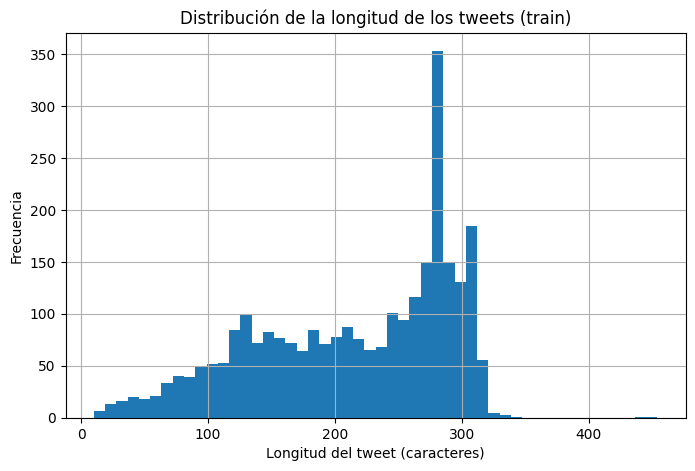

In [ ]:
dataset_train_df["text_len"] = dataset_train_df["text"].astype(str).str.len()

plt.figure(figsize=(8, 5))
dataset_train_df["text_len"].hist(bins=50)
plt.xlabel("Longitud del tweet (caracteres)")
plt.ylabel("Frecuencia")
plt.title("Distribución de la longitud de los tweets (train)")
plt.show()

La distribución de la longitud de los tweets muestra que la mayoría se sitúan entre 200 y 300 caracteres, con un pico muy marcado alrededor de 280 caracteres. Esto indica que gran parte del dataset contiene mensajes relativamente largos, algo habitual cuando lo textos provienen de comentarios extensos o hilos.

**Análisis de contenido de los tweets**

Para ello utiliza wordclouds

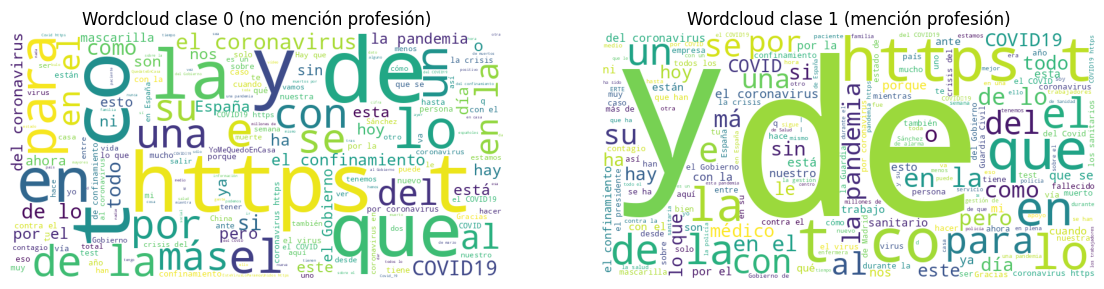

In [ ]:
# Separamos textos por label
text_class0 = " ".join(dataset_train_df.loc[dataset_train_df["label"] == 0, "text"].astype(str).tolist())
text_class1 = " ".join(dataset_train_df.loc[dataset_train_df["label"] == 1, "text"].astype(str).tolist())

wc0 = WordCloud(width=800, height=400, background_color="white").generate(text_class0)
wc1 = WordCloud(width=800, height=400, background_color="white").generate(text_class1)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(wc0)
plt.axis("off")
plt.title("Wordcloud clase 0 (no mención profesión)")

plt.subplot(1, 2, 2)
plt.imshow(wc1)
plt.axis("off")
plt.title("Wordcloud clase 1 (mención profesión)")

plt.show()

Las nubes de palabras muestran diferencias claras entre las dos cases. En la clase 0 (sin mención de profesión) predominan palabras genéricas como "de", "la", "que", "en", t
ipicas de mensajes generales sin un tema profesional específico. En cambio, en la clase 1 aparecen términos más relacionados con el ámbito laboral o sanitario, como "COVID", "test", "médico", "sanitario","trabajo", lo que indica que estos textos tienden a referirse a profesiones o contextos profesionales. Estas diferencias confirman que el lenguaje usado en cada clase tiene patrones distintos y que el modelo debería poder aprevecharlos durante el entrenamiento.

## Tokenización

El texto del dataset no está preparado para ser introducido en un modelo Transformers. Lleva a cabo el proceso de tokenización.

In [ ]:
# IMPORTS
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    DataCollatorWithPadding,
    TrainingArguments,
    Trainer,
)
import torch
import evaluate


Selecciona un modelo apropiado para la tarea:

> Recuerda que en la siguiente celda sólo debes asignar un valor a model_name. No añadas más información en la celda.

In [ ]:
#NO-MODIFY: VARIABLE NAME
model_name = "dccuchile/bert-base-spanish-wwm-cased"

Puedes continuar con el proceso aquí:

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_name) # Cargamos el tokenizador del modelo elegido

tokenizer_config.json:   0%|          | 0.00/364 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/648 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/134 [00:00<?, ?B/s]

In [ ]:
def tokenize_function(examples): # Esta función toma los textos originales y los conveirte en tokens
    return tokenizer(
        examples["text"],
        truncation=True,
        padding=False,
    )

In [ ]:
# Aplicamos la tokenización a todo el dataset (train/val/test) de manera vectorizada
tokenized_datasets = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/2786 [00:00<?, ? examples/s]

Map:   0%|          | 0/999 [00:00<?, ? examples/s]

Map:   0%|          | 0/1001 [00:00<?, ? examples/s]

In [ ]:
# Información sobre las etiquetas del dataset:
# Número de clases y nombres de cada una.
label_feature = dataset["train"].features["label"]
num_labels = label_feature.num_classes
label_names = label_feature.names

# Diccionarios necesarios para mapear etiquetas {id ↔ label_name}
id2label = {i: name for i, name in enumerate(label_names)}
label2id = {name: i for i, name in enumerate(label_names)}

In [ ]:
# Ejemplo tokenizado
tokenized_datasets["train"][0]

{'tweet_id': '1275401361073586177',
 'text': 'Las / os sanitarias / os no necesitan capas de superhéroes y superheroínas , necesitan fondos suficientes para los EPI que deben usar , para respiradores ... Exijámoslo 🧑 🏻\u200d ⚕ ️ 👩 🏻\u200d ⚕ ️ 👨 🏻\u200d ⚕ ️ # MFyC # COVID19 # DespuésDeAplaudir https://t.co/lizZEYp5Jj',
 'label': 1,
 'input_ids': [4,
  1613,
  972,
  2821,
  20159,
  972,
  2821,
  1084,
  6487,
  17245,
  1008,
  28110,
  1019,
  1042,
  25141,
  1120,
  14386,
  1017,
  6487,
  4161,
  8190,
  1110,
  1065,
  11680,
  30977,
  1038,
  2748,
  4341,
  1017,
  1110,
  12229,
  3861,
  1009,
  1009,
  1009,
  2135,
  12361,
  2680,
  1011,
  1088,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  1097,
  30999,
  30950,
  30961,
  3,
  2396,
  8895,
  30971,
  7024,
  3,
  3310,
  30971,
  30931,
  30963,
  10822,
  3095,
  30936,
  1045,
  4640,
  5269,
  1181,
  972,
  972,
  1031,
  1009,
  1345,
  972,
  1483,
  30962,
  983,
  30956,
  30997,
  30944

## Fine-tuning

Carga el model para ser ajustado posteriormente:

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=num_labels,
    id2label=id2label,
    label2id=label2id,
)

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Configuracion training_args

Configura los parámetros de entrenamiento del modelo.


>

> Recuerda que en la siguiente celda sólo debes asignar atributos a la variable training_args. No añadas  otras variables en la celda

In [ ]:
#NO-MODIFY: VARIABLE NAME+
training_args = TrainingArguments(
   output_dir="profner_model_beto",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_steps=50,
    save_steps=500,        # guarda cada 500 pasos
    eval_steps=500,        # evalúa cada 500 pasos
    logging_dir="./logs",
    report_to = "none",
)

### Métricas de evaluación

Define las métricas de evaluación

In [ ]:
import numpy as np
import evaluate

accuracy_metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=-1)

    acc = accuracy_metric.compute(predictions=predictions, references=labels)["accuracy"]
    f1 = f1_metric.compute(predictions=predictions, references=labels, average="binary")["f1"]

    return {
        "accuracy": acc,
        "f1": f1,        # <-- mantener la clave "f1"
    }

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

### Ajuste del modelo

Lleva a cabo el ajuste del modelo:

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

/tmp/ipython-input-3893836303.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
trainer.train()

Step,Training Loss
50,0.644000
100,0.469100
150,0.239400
200,0.240400
250,0.171600
300,0.161700
350,0.148100
400,0.069000
450,0.100400
500,0.093500


TrainOutput(global_step=525, training_loss=0.22524041471027192, metrics={'train_runtime': 42.9489, 'train_samples_per_second': 194.603, 'train_steps_per_second': 12.224, 'total_flos': 444600128015040.0, 'train_loss': 0.22524041471027192, 'epoch': 3.0})

## Evaluacion

Una vez llevada a cabo el entrenamiento, realiza la evaluación del modelo.

In [ ]:
# Evaluación del modelo sobre el conjunto de validación
eval_results = trainer.evaluate(tokenized_datasets["validation"])
print("Resultados de evaluación (validation):")
print(eval_results)



Resultados de evaluación (validation):
{'eval_loss': 0.2674158811569214, 'eval_accuracy': 0.9379379379379379, 'eval_f1': 0.87890625, 'eval_runtime': 1.7589, 'eval_samples_per_second': 567.955, 'eval_steps_per_second': 35.817, 'epoch': 3.0}


Los resultados del modelo son muy buenos. La *accuracy* del 94% indica que acierta la gran mayoría de los casos, lo cual es un rendimiento alto. En la clase 0 el modelo va sibrado: F1 de 0.96, con muy poca confusión. En la clase 1, que suele ser la minoritaria, mantieen un F1 de 0.88, con un recall de 0.94, es decir, detecta casi todos los positivos reales, auqnue a costa de algo de pérdida en precisión (0.83). La matriz de confusión muestra pocos falsos negativos (14) y un número aceptable de falsos positivos (46). En conjunto, es un modelo equilibrado y eficaz, especialmente bueno si en la tarea es más importante no dejar espacar casos de la clase 1.

## Genera predicciones

Genera predicciones sobre el test set. Recuerda que el archivo que generes y adjuntes al ejercicio debe tener dos columnas:


| id         | label |
|------------|-------|
| 1234567890 | 1     |
| 1234567891 | 0     |
| 1234567892 | 0     |
| 1234567893 | 1     |

- El archivo debe estar en formato **TSV** (separado por tabuladores).
- Debe contener exactamente **dos columnas**: `id` y `label`.
- Es obligatorio incluir la **cabecera**.


In [ ]:
predictions = trainer.predict(tokenized_datasets["validation"])

In [ ]:
y_pred = np.argmax(predictions.predictions, axis=-1)
y_true = predictions.label_ids

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true,y_pred))

[[712  49]
 [ 13 225]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       761
           1       0.82      0.95      0.88       238

    accuracy                           0.94       999
   macro avg       0.90      0.94      0.92       999
weighted avg       0.94      0.94      0.94       999



In [ ]:
import numpy as np
import pandas as pd

# 1. Preparamos el test set SIN posibles columnas de etiqueta
test_dataset = tokenized_datasets["test"]
cols_to_remove = [c for c in ["label", "labels"] if c in test_dataset.column_names]
test_dataset = test_dataset.remove_columns(cols_to_remove)

# 2. Predicciones sobre el conjunto de test
test_predictions = trainer.predict(test_dataset)
test_preds = np.argmax(test_predictions.predictions, axis=-1)

# 3. Obtenemos los ids del conjunto de test
test_ids = dataset["test"]["tweet_id"]

# 4. Creamos el DataFrame de envío
submission_df = pd.DataFrame({
    "id": test_ids,
    "label": test_preds,
})

# 5. Guardamos en formato TSV con cabecera
submission_df.to_csv("Riera_Guardia_Pau_ejercicio1_predicciones.tsv", sep="\t", index=False)

submission_df.head()

,id,label
0,1277969650051997701,1
1,1263161378627600385,0
2,1255919996779315208,0
3,1282361712117780486,0
4,1267872916009615364,0
